# ANALISI COMPLETA CARS DATASET

## 1 Import delle librerie

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [44]:
sns.set(style='whitegrid')

## 2. Caricamento del dataset

In [45]:
df = pd.read_csv('cars.csv', encoding='latin-1')

## 3. Pulizia dei dati

In [46]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [48]:
df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


## Pulizia dei dati

### trasformazione numerica

In [49]:
def clean(x):
    if pd.isna(x):
        return np.nan
    x = str(x).lower()
    # Rimuove unità e simboli
    x = re.sub(r'(cc|hp|km/h|sec|\$|nm|,)', '', x)
   
    if '-' in x:
        x = x.split('-')[0].strip()
    try:
        return float(x)
    except:
        return np.nan


for col in numeric_cols:
    df[col] = df[col].apply(lambda x: clean_numeric_regex(x))


### gestione valori mancanti

In [50]:
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace = True)

C:\Users\Rosy\AppData\Local\Temp\ipykernel_6332\430103523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
C:\Users\Rosy\AppData\Local\Temp\ipykernel_6332\430103523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

### controllo di outlier (z-score)

In [51]:
z_scores = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()
df['Outlier'] = (abs(z_scores) > 3).any(axis=1)


def count_outliers(df, cols):
    z = (df[cols] - df[cols].mean()) / df[cols].std()
    return (abs(z) > 3).sum()

In [52]:
print("Outlier per colonna:")
print(count_outliers(df, numeric_cols))

Outlier per colonna:
CC/Battery Capacity           7
HorsePower                   17
Total Speed                  11
Performance(0 - 100 )KM/H    11
Cars Prices                  14
Seats                         3
Torque                        6
dtype: int64


## Grafici

### Istogramma

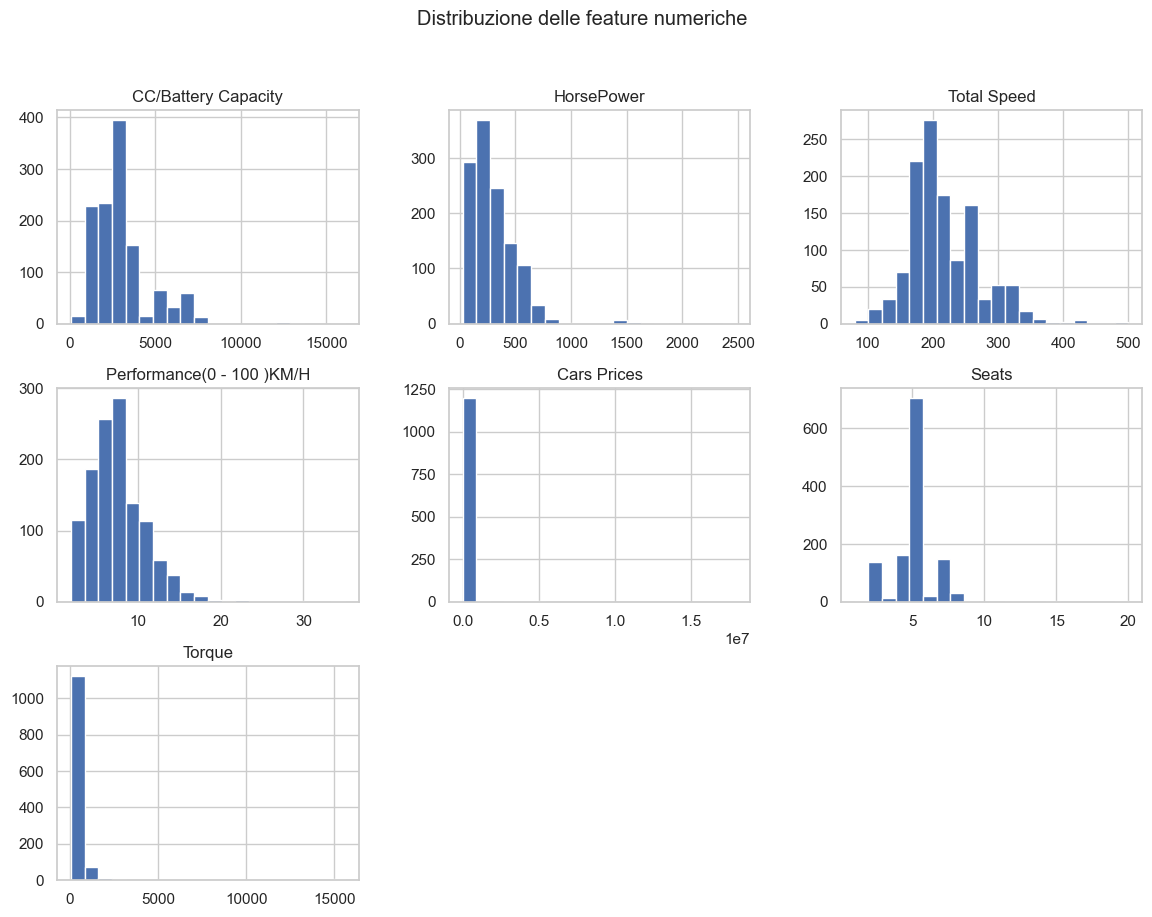

In [53]:
# Istogrammi per tutte le colonne numeriche
df[numeric_cols].hist(figsize=(14,10), bins=20)
plt.suptitle('Distribuzione delle feature numeriche')
plt.show()


### PairPlot con outlier

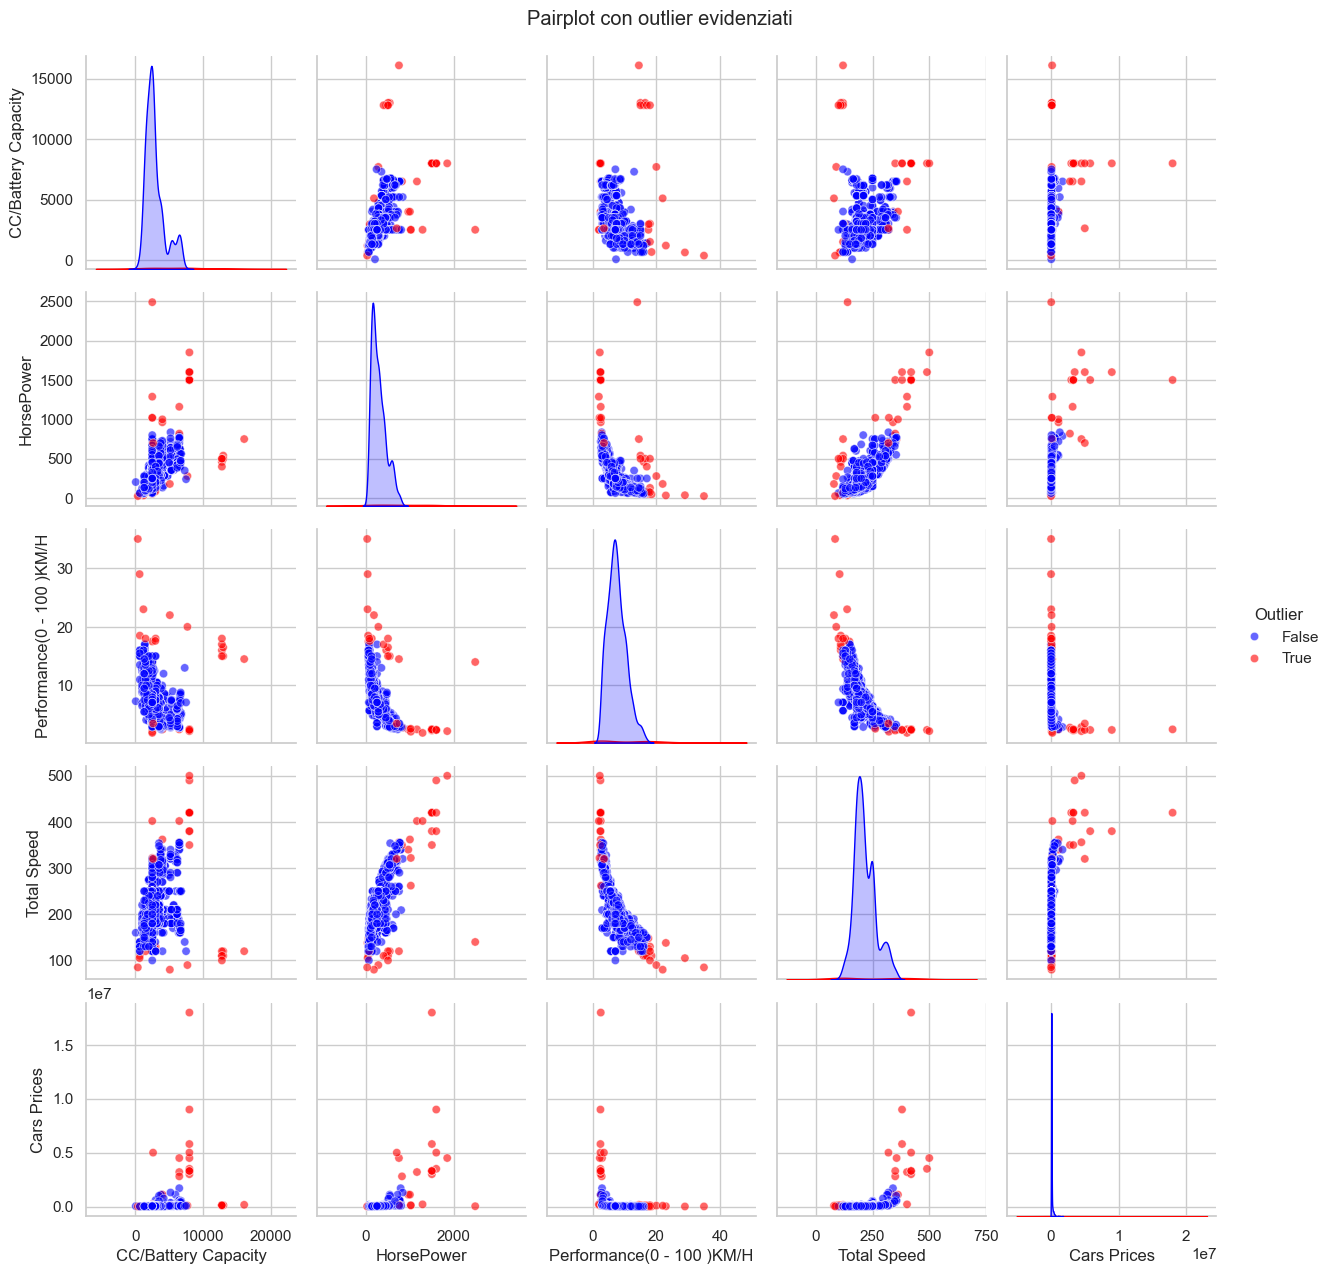

In [ ]:
# Calcolo z-score manuale per le colonne selezionate
z = (df[selected_cols] - df[selected_cols].mean()) / df[selected_cols].std()
df['Outlier'] = (abs(z) > 3).any(axis=1)  

# Pairplot con outlier in rosso
sns.pairplot(df[selected_cols + ['Outlier']], hue='Outlier',
             palette={True: 'red', False: 'blue'}, plot_kws={'alpha':0.6})
plt.suptitle('Pairplot con outlier evidenziati', y=1.02)
plt.show()


### Matrice di correlazione

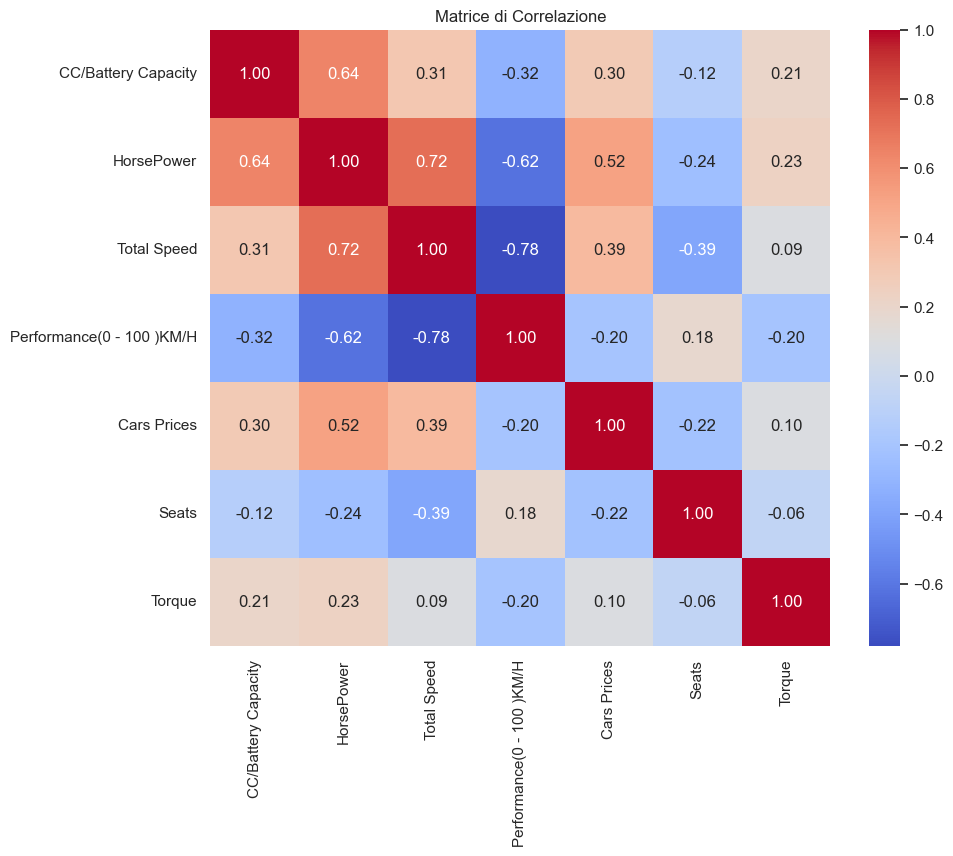

In [55]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice di Correlazione')
plt.show()


### Correlazione senza outlier

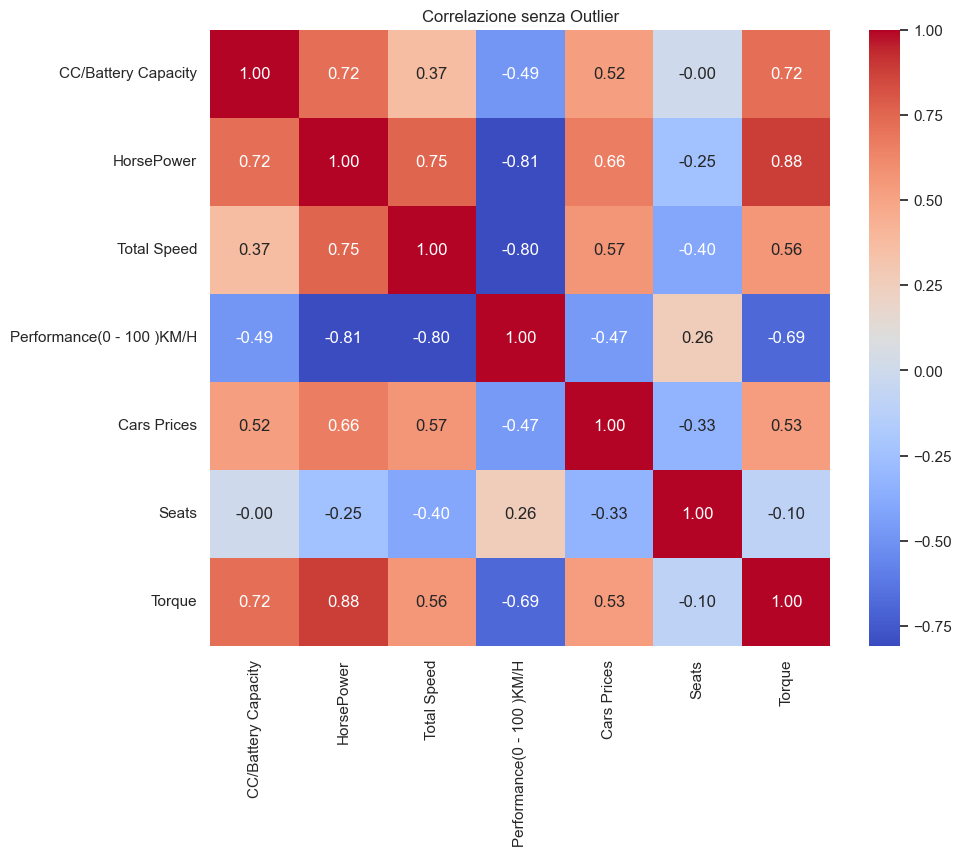

In [56]:
df_no_outliers = df[(abs(z_scores) < 3).all(axis=1)]
corr_no_out = df_no_outliers[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_no_out, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlazione senza Outlier')
plt.show()


### Feature derivate / combinate

In [64]:
df['HorsePower_per_CC'] = df['HorsePower'] / (df['CC/Battery Capacity'] + 1e-6)
df['CC_div_HorsePower'] = df['CC/Battery Capacity'] / (df['HorsePower'] + 1e-6)

### Scatterplot per feature derivate

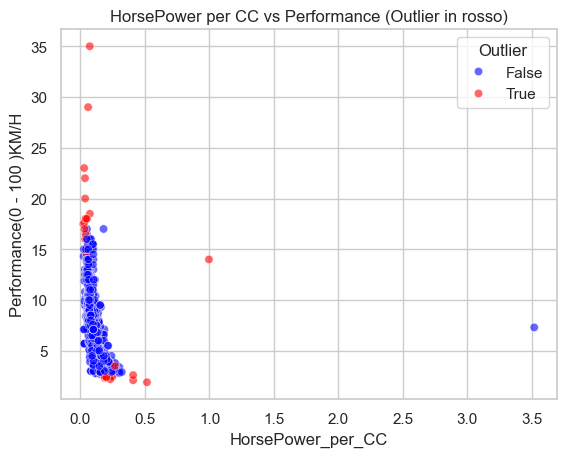

In [58]:
sns.scatterplot(x='HorsePower_per_CC', y='Performance(0 - 100 )KM/H', data=df, hue='Outlier',
                palette={True:'red', False:'blue'}, alpha=0.6)
plt.title('HorsePower per CC vs Performance (Outlier in rosso)')
plt.show()

### Raggruppamento per fasce di prezzo

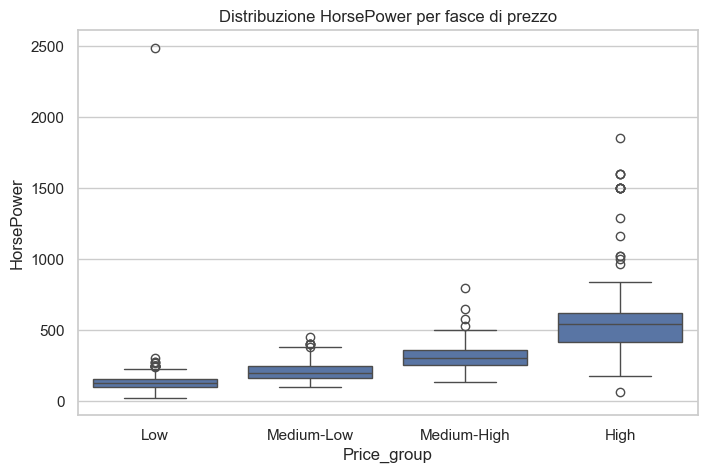

In [59]:
df['Price_group'] = pd.qcut(df['Cars Prices'], q=4, labels=['Low','Medium-Low','Medium-High','High'])
plt.figure(figsize=(8,5))
sns.boxplot(x='Price_group', y='HorsePower', data=df)
plt.title('Distribuzione HorsePower per fasce di prezzo')
plt.show()

###  Distribuzione dei prezzi per performance

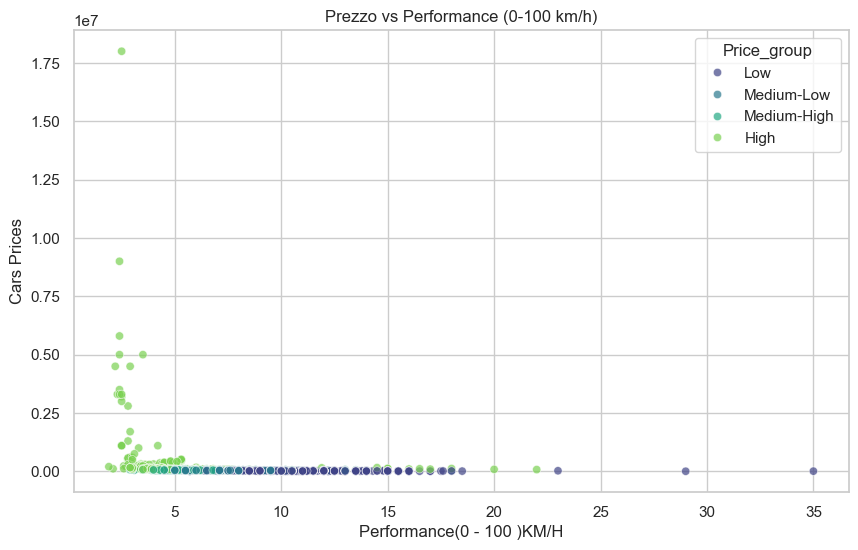

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Performance(0 - 100 )KM/H', y='Cars Prices', data=df, hue='Price_group', palette='viridis', alpha=0.7)
plt.title('Prezzo vs Performance (0-100 km/h)')
plt.show()

### Raggruppare feature continue

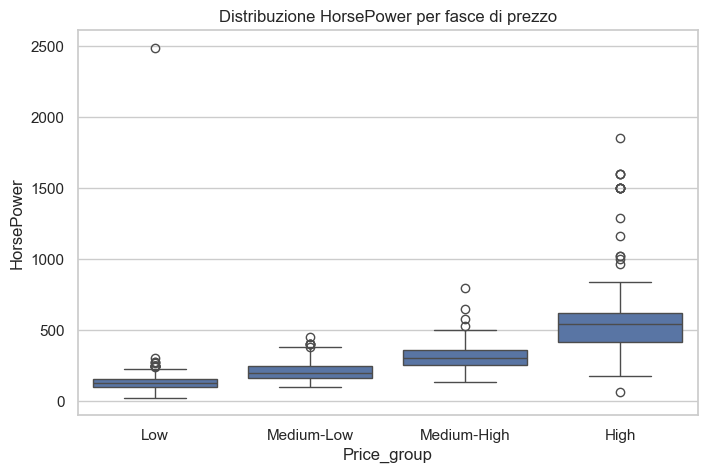

In [63]:
df['Price_group'] = pd.qcut(df['Cars Prices'], q=4, labels=['Low','Medium-Low','Medium-High','High'])
plt.figure(figsize=(8,5))
sns.boxplot(x='Price_group', y='HorsePower', data=df)
plt.title('Distribuzione HorsePower per fasce di prezzo')
plt.show()